Establish connection - standard bit of code that will set up the Intelligent Plant App Store and Data Core API clients for a notebook

In [44]:
%pip install pandas matplotlib

    100% |████████████████████████████████| 10.4MB 149kB/s eta 0:00:01
    100% |████████████████████████████████| 13.1MB 120kB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 6.0MB/s eta 0:00:01
    100% |████████████████████████████████| 20.0MB 77kB/s  eta 0:00:01
    100% |████████████████████████████████| 512kB 3.0MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 12.5MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 13.1MB/s ta 0:00:01
    100% |████████████████████████████████| 583kB 2.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import intelligent_plant.utility as utility

In [2]:
import intelligent_plant.app_store_client as app_store_client
from os.path import expanduser
app_store = app_store_client.AppStoreClient(open(expanduser("~/.access_token"), "r").read())
data_core = app_store.get_data_core_client()

Get data source from data core

Source is '23258373C8D960DBE49C8DEF4CB2DF4212F3352CFDA1B0672F55E27577F1CA3F.WND PI Historian'

Build list of tages to be retrieved

In [53]:
tags = {
    "23258373C8D960DBE49C8DEF4CB2DF4212F3352CFDA1B0672F55E27577F1CA3F.WND PI Historian": [
        "WND-GFR-A11PI101A.PV",
        "WND-GFR-A11TI101A.PV",
        "WND-GFR-A12PI101A.PV",
        "WND-GFR-A12TI101A.PV",
        "WND-GFR-A13PI101A.PV",
        "WND-GFR-A13TI101A.PV",
        "WND-GFR-A03-UXT-01-PTT-109A.Pressure.ENG",
        "WND-GFR-A03-UXT-01-PTT-109A.Temperature.ENG",
        "WND-GFR-A04-UXT-01-PTT-109A.Pressure.ENG",
        "WND-GFR-A04-UXT-01-PTT-109A.Temperature.ENG",
        "WND-GFR-A05-UXT-01-PTT-109A.Pressure.ENG",
        "WND-GFR-A17-UXT-01-PTT-109A.Temperature.ENG",
        "WND-GFR-A17-UXT-01-PTT-109A.Pressure.ENG",
        "WND-GFR-A03-UXT-01-PTT-109A.Pressure.ENG",
        "WND-GFR-A03-UXT-01-PTT-109A.Temperature.ENG",
        "WND-GFR-A03-UXT-01-PTT-109A.Pressure.ENG",
        "WND-GFR-A03-UXT-01-PTT-109A.Temperature.ENG",
        "WND-GFR-A03-UXT-01-PTT-109A.Pressure.ENG",
        "WND-GFR-A03-UXT-01-PTT-109A.Pressure.ENG",
        "WND-GFR-A03-UXT-01-PTT-109A.Temperature.ENG"
        "WND-GFR-A03-UXT-01-FT-214.Flowrate.ENG",
        "WND-GFR-A03-UXT-01-FT-115.Console.Volume-flow-rate-Water-RC.ENG"
    ]
}

Below block is to set a single tag to experiment - IGNORE - DON'T RUN

In [25]:
tags = {
    "23258373C8D960DBE49C8DEF4CB2DF4212F3352CFDA1B0672F55E27577F1CA3F.WND PI Historian": [
    "WND-GFR-A03*FI*214*"
    ]
}

Get data for the above tags averaged down to 1 minute intervals

In [55]:
resp = data_core.get_processed_data(tags, "*-30d", "*", "1h", "interp")
df = utility.query_result_to_data_frame(resp)
df

,TimeStamp,WND-GFR-A03-UXT-01-FT-115.Console.Volume-flow-rate-water-RC.ENG,WND-GFR-A03-UXT-01-PTT-109A.Pressure.ENG,WND-GFR-A03-UXT-01-PTT-109A.Temperature.ENG,WND-GFR-A04-UXT-01-PTT-109A.Pressure.ENG,WND-GFR-A12PI101A.PV,WND-GFR-A11PI101A.PV,WND-GFR-A17-UXT-01-PTT-109A.Temperature.ENG,WND-GFR-A12TI101A.PV,WND-GFR-A13PI101A.PV,WND-GFR-A05-UXT-01-PTT-109A.Pressure.ENG,WND-GFR-A11TI101A.PV,WND-GFR-A04-UXT-01-PTT-109A.Temperature.ENG,WND-GFR-A13TI101A.PV,WND-GFR-A17-UXT-01-PTT-109A.Pressure.ENG
0,2019-11-02 15:58:59+00:00,11.453994467698,110.381,34.60545,105.19,92.85165,92.83154,34.2957,20.07955,89.96045,99.4625,17.65517,25.4604,22.36663,113.2137
1,2019-11-02 16:58:59+00:00,11.44602704183,110.4069,34.60644,105.3479,92.88964,92.94625,34.29853,20.04447,90.03136,99.53707,17.75508,25.68427,22.37217,113.2648
2,2019-11-02 17:58:59+00:00,11.438059615962,110.4328,34.60744,105.2215,92.98491,93.01938,34.30135,20.03215,90.10609,99.61163,17.74145,26.25429,22.38748,113.3159
3,2019-11-02 18:58:59+00:00,11.4300921900941,110.4587,34.60844,105.2766,93.01229,92.9809,34.30418,20.15228,90.18124,99.6862,17.79803,26.24724,22.37795,113.367
4,2019-11-02 19:58:59+00:00,11.4221247642261,110.4847,34.60927,105.3271,93.06284,93.04356,34.307,20.22557,90.18124,99.72162,17.87953,26.24137,22.41291,113.4115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,2019-12-02 11:58:59+00:00,11.3938465896832,114.7354,36.54273,109.739,98.37334,98.39096,36.65825,22.508,95.14122,105.0778,18.98316,28.67187,24.48143,118.67
717,2019-12-02 12:58:59+00:00,11.3689836702055,114.7259,36.53718,109.7374,98.31647,98.34061,36.65905,22.62481,95.14122,105.0614,18.87559,28.66163,24.54198,118.6639
718,2019-12-02 13:58:59+00:00,11.3441207507277,114.7163,36.52918,109.7357,98.33204,98.37554,36.65894,22.48688,95.14122,105.0451,19.09355,28.68327,24.52021,118.6578
719,2019-12-02 14:58:59+00:00,11.31925783125,114.7068,36.52119,109.7341,98.41374,98.37682,36.65882,22.66995,95.14281,105.0288,18.67824,28.70378,24.30405,118.6517


In [25]:
df = pd.to_numeric(df)

TypeError: arg must be a list, tuple, 1-d array, or Series

In [48]:
df.columns = ['TimeStamp', 'Pressure', 'Temperature']
#df['Pressure'] = pd.to_numeric(df.Pressure, errors = coerce)
df['Pressure'] = pd.to_numeric(df.Pressure)

ValueError: Unable to parse string "I/O Timeout" at position 287

In [44]:
len(df)


AttributeError: 'DataFrame' object has no attribute 'names'

Plot the data retrieved

ValueError: Unable to parse string "I/O Timeout" at position 288

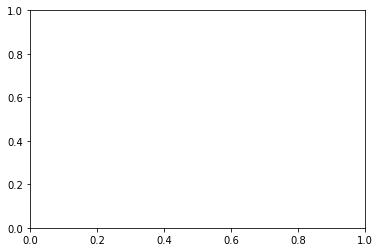

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

plt.plot(kind = 'line', x = pd.to_numeric(df['WND-GFR-A12TI101A.PV']), y = pd.to_numeric(df['WND-GFR-A12PI101A.PV']), ax = ax)
plt.plot(kind = 'line', x = pd.to_numeric(df['WND-GFR-A11TI101A.PV']), y = pd.to_numeric(df['WND-GFR-A11PI101A.PV']), color = 'red', ax = ax)
#df.plot(kind = 'line', x='TimeStamp', y = 'WND-GFR-A12TI101A.PV', color = 'red', ax = ax)

plt.show()


In [39]:
df.dtypes

TimeStamp               datetime64[ns, UTC]
WND-GFR-A11PI101A.PV                 object
WND-GFR-A11TI101A.PV                 object
dtype: object

In [18]:
df["WND-GFR-A11PI101A.PV"]

0      92.08889
1      92.68818
2      92.82496
3      92.96339
4        92.946
         ...   
716    98.45529
717    98.40088
718    98.33047
719    98.33433
720    98.42583
Name: WND-GFR-A11PI101A.PV, Length: 721, dtype: object

In [34]:
fred = pd.to_numeric(df.WND-GFR-A12TI101A.PV)

AttributeError: 'DataFrame' object has no attribute 'WND'

In [32]:
df["WND-GFR-A11PI101A.PV"]

0      92.08889
1      92.68818
2      92.82496
3      92.96339
4        92.946
         ...   
716    98.45529
717    98.40088
718    98.33047
719    98.33433
720    98.42583
Name: WND-GFR-A11PI101A.PV, Length: 721, dtype: object